# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

## Clean up the data

In [409]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(study_results, mouse_metadata, on=['Mouse ID'])

# Display the data table for preview

merged_df.head()

# Set default style for plots

plt.style.use("default")

In [410]:
# Checking the number of mice

unique_mice_ids = len(merged_df["Mouse ID"].unique())
print(f'Unique mice IDs = {unique_mice_ids}')

merged_df['Mouse ID'].value_counts()

Unique mice IDs = 249


g989    13
i334    10
i738    10
a444    10
l725    10
        ..
t573     1
l872     1
x336     1
f932     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [411]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

search_duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
search_duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [412]:
# Getting all the data for the duplicate mouse ID

duplicate_mouse_ID = merged_df.loc[merged_df["Mouse ID"] == 'g989']
duplicate_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [413]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID

clean_df = merged_df.loc[merged_df["Mouse ID"] != 'g989']
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [414]:
# Checking the number of mice in the clean DataFrame

new_unique_mice_ids = len(clean_df["Mouse ID"].unique())
print(f'Unique mice IDs = {new_unique_mice_ids}')

clean_df["Mouse ID"].value_counts()

Unique mice IDs = 248


a685    10
y769    10
z578    10
b559    10
s185    10
        ..
t573     1
l872     1
x336     1
f932     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [415]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

column_in_study = 'Tumor Volume (mm3)'
group_drug_regimen = clean_df.groupby('Drug Regimen')

mean = group_drug_regimen[column_in_study].mean()
median = group_drug_regimen[column_in_study].median()
variance = group_drug_regimen[column_in_study].var()
std_dev = group_drug_regimen[column_in_study].std()
std_err = group_drug_regimen[column_in_study].sem()

summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean,
                                   'Median Tumor Volume': median,
                                   'Variance Tumor Volume': variance, 
                                   'Std. Dev. Tumor Volume': std_dev, 
                                   'Std. Err. Tumor Volume': std_err })

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,Std. Err. Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [416]:
# Set data for plotting bar charts (based on timepoint)

data_timepoint = group_drug_regimen["Timepoint"].count().sort_values(ascending = False)
data_timepoint

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Timepoint, dtype: int64

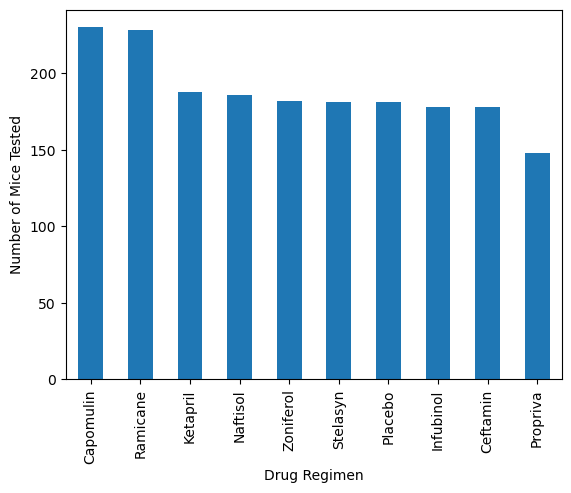

In [417]:
# Bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
 
total_timepoints = data_timepoint.plot(kind="bar", legend=False)
total_timepoints.set_ylabel("Number of Mice Tested");

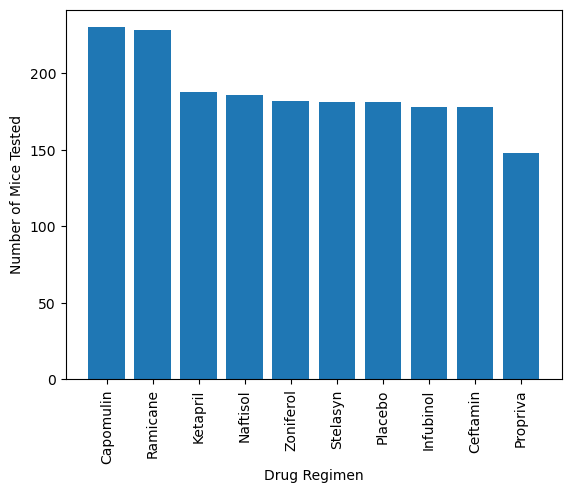

In [418]:
# Bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot

x_axis = data_timepoint.index
y_axis = data_timepoint

plt.bar(x_axis, y_axis)
plt.xticks(rotation= "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [419]:
# Set data for plotting pie charts (based on sex)

data_sex = clean_df['Sex'].value_counts()
data_sex

Male      958
Female    922
Name: Sex, dtype: int64

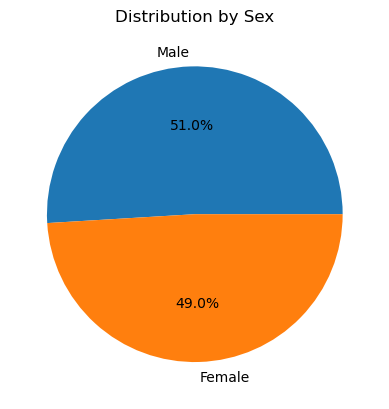

In [420]:
# Pie plot showing the distribution of female versus male mice using Pandas

sex = data_sex.plot.pie(autopct="%1.1f%%", title='Distribution by Sex')
sex.set_ylabel("");


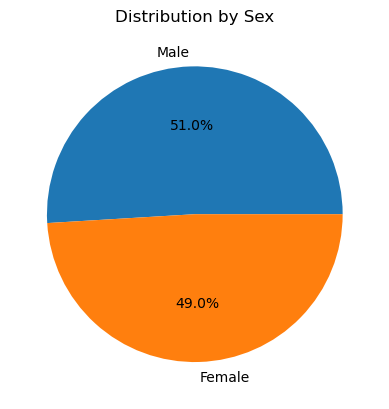

In [421]:
# Pie plot showing the distribution of female versus male mice using pyplot

labels = data_sex.index.values
plt.pie(data_sex, labels=labels, autopct="%1.1f%%")
plt.title("Distribution by Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [422]:
# Final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [423]:
# Start by getting the last (greatest) timepoint for each mouse

mouse_last_greatest_timepoint = pd.DataFrame(clean_df.groupby('Mouse ID')["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_df = pd.merge(clean_df, mouse_last_greatest_timepoint, 
                    on=("Mouse ID", "Timepoint"), how="right")
last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [424]:
# Lists of treatments (for loop and labels), and empty list for tumor vol data

best_drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

for drug in best_drug_regimen:

    timepoint = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == drug]
    values_for_tumor_vol = timepoint['Tumor Volume (mm3)']
    tumor_vol.append(values_for_tumor_vol)

    # Quartiles, IQR, Bounds, and Potential Outliers

    print(f'{drug}:')

    quartiles = values_for_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    print(f'IQR is {iqr}')

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f'Lower Bound is {lower_bound}')
    print(f'Upper Bound is {upper_bound}')

    outliers = values_for_tumor_vol.loc[(values_for_tumor_vol >= upper_bound) | 
                                      (values_for_tumor_vol <= lower_bound)]
    print(f'Potential Outliers found are {outliers.count()}, info: {outliers}')

    print("------------------------------------------------------------------------------------------")

Capomulin:
IQR is 7.781863460000004
Lower Bound is 20.70456164999999
Upper Bound is 51.83201549
Potential Outliers found are 0, info: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------------------------------------
Ramicane:
IQR is 9.098536719999998
Lower Bound is 17.912664470000003
Upper Bound is 54.30681135
Potential Outliers found are 0, info: Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------------------------------------------------------------------------
Infubinol:
IQR is 11.477135160000003
Lower Bound is 36.83290494999999
Upper Bound is 82.74144559000001
Potential Outliers found are 1, info: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------------------------------------------------------------
Ceftamin:
IQR is 15.577752179999997
Lower Bound is 25.355449580000002
Upper Bound is 87.66645829999999
Potential Outliers found are 0, info: Series([], Nam

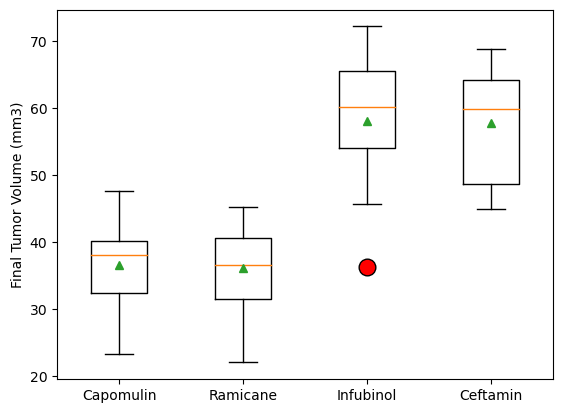

In [441]:
# Box plot that shows the distrubution of the tumor volume for each treatment group

outlier_format = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
plt.boxplot(tumor_vol, flierprops=outlier_format, showmeans=True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], best_drug_regimen)
plt.show()
